In [3]:
import torch  # ÂØºÂÖ•PyTorchÂ∫ì
import torch.nn as nn  # ÂØºÂÖ•PyTorchÁ•ûÁªèÁΩëÁªúÊ®°Âùó
import math  # ÂØºÂÖ•Êï∞Â≠¶ÂáΩÊï∞Â∫ì
from torch.nn import functional as F  # ÂØºÂÖ•PyTorchÂáΩÊï∞ÂºèAPI

# ÂÆö‰πâÁõ∏ÂØπ‰ΩçÁΩÆÁºñÁ†ÅÊ®°ÂùóÔºåÁõ∏ÂØπ‰ΩçÁΩÆÁºñÁ†ÅÊòØÊúâÂèÇÊï∞ÁöÑÔºåÂèØËÆ≠ÁªÉÁöÑ
class RelativePositionEmbedding(nn.Module):
    def __init__(self, max_seq_len: int, embedding_dim: int):
        super().__init__()  # Ë∞ÉÁî®Áà∂Á±ªÂàùÂßãÂåñÊñπÊ≥ï
        self.max_seq_len = max_seq_len  # ÊúÄÂ§ßÂ∫èÂàóÈïøÂ∫¶
        self.embedding_dim = embedding_dim  # ÂµåÂÖ•Áª¥Â∫¶
        self.relative_positions = nn.Parameter(torch.randn(max_seq_len * 2 - 1, embedding_dim))  # ÂàõÂª∫Áõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•ÂèÇÊï∞ÔºåÂØÜÈõÜÂêëÈáèÁü©ÈòµÔºåmax_seq_len * 2 - 1ÊòØÁõ∏ÂØπ‰ΩçÁΩÆÁü©ÈòµÁöÑË°åÊï∞Ôºåembedding_dimÊòØÁõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•ÂèÇÊï∞ÁöÑÂàóÊï∞
    
    def forward(self, seq_len: int):
        relative_positions_matrix = self._generate_relative_positions_matrix(seq_len)  # ÁîüÊàêÁõ∏ÂØπ‰ΩçÁΩÆÁü©Èòµ
        relative_embeddings = F.embedding(relative_positions_matrix, self.relative_positions)  # Ëé∑ÂèñÁõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•,F.embeddingÁöÑ‰ΩúÁî®ÊòØÊ†πÊçÆÁ¥¢ÂºïËé∑ÂèñÂØπÂ∫îÁöÑÂµåÂÖ•ÔºåÁ¥¢ÂºïÊòØÁõ∏ÂØπ‰ΩçÁΩÆÁü©ÈòµÔºåÂµåÂÖ•ÊòØÁõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•ÂèÇÊï∞
        return relative_embeddings  # ËøîÂõûÁõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•
    
    def _generate_relative_positions_matrix(self, seq_len: int):
        range_vec = torch.arange(seq_len)  # ÂàõÂª∫Â∫èÂàóÈïøÂ∫¶ËåÉÂõ¥ÂêëÈáè
        range_matrix = range_vec.unsqueeze(0).expand(seq_len, seq_len)  # Êâ©Â±ï‰∏∫Áü©Èòµ
        distance_matrix = range_matrix - range_matrix.t()  # ËÆ°ÁÆó‰ΩçÁΩÆÂ∑ÆË∑ùÁü©Èòµ
        distance_matrix = distance_matrix + self.max_seq_len - 1  # Â∞ÜË¥üÂÄºÂÅèÁßª‰∏∫ÈùûË¥üÂÄº
        return distance_matrix  # ËøîÂõûÁõ∏ÂØπ‰ΩçÁΩÆÁü©Èòµ

# ÂÆö‰πâÂ§öÂ§¥Ê≥®ÊÑèÂäõÊ®°Âùó
class MultiHeadAttention(nn.Module):
    def __init__(self, embed_dim: int, num_heads: int, max_seq_len: int):
        super().__init__()  # Ë∞ÉÁî®Áà∂Á±ªÂàùÂßãÂåñÊñπÊ≥ï
        self.embed_dim = embed_dim  # ÂµåÂÖ•Áª¥Â∫¶
        self.num_heads = num_heads  # Ê≥®ÊÑèÂäõÂ§¥Êï∞
        self.head_dim = embed_dim // num_heads  # ÊØè‰∏™Â§¥ÁöÑÁª¥Â∫¶
        self.q_proj = nn.Linear(embed_dim, embed_dim)  # Êü•ËØ¢ÂêëÈáèÁöÑÁ∫øÊÄßÊäïÂΩ±
        self.k_proj = nn.Linear(embed_dim, embed_dim)  # ÈîÆÂêëÈáèÁöÑÁ∫øÊÄßÊäïÂΩ±
        self.v_proj = nn.Linear(embed_dim, embed_dim)  # ÂÄºÂêëÈáèÁöÑÁ∫øÊÄßÊäïÂΩ±
        self.rel_pos_embeddings = RelativePositionEmbedding(max_seq_len, self.head_dim)  # Áõ∏ÂØπ‰ΩçÁΩÆÁºñÁ†Å
        self.out_proj = nn.Linear(embed_dim, embed_dim)  # ËæìÂá∫ÁöÑÁ∫øÊÄßÊäïÂΩ±
    
    def forward(self, query: torch.Tensor, key: torch.Tensor, value: torch.Tensor):
        batch_size, seq_len, embed_dim = query.size()  # Ëé∑ÂèñËæìÂÖ•Âº†ÈáèÁöÑÂΩ¢Áä∂
        
        # ÊäïÂΩ±Âπ∂ÈáçÂ°ë‰∏∫Â§öÂ§¥ÂΩ¢Âºè
        query = self.q_proj(query).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)  # (batch_size, num_heads, seq_len, head_dim)
        key = self.k_proj(key).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)  # (batch_size, num_heads, seq_len, head_dim)
        value = self.v_proj(value).view(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)  # (batch_size, num_heads, seq_len, head_dim)
        
        # ËÆ°ÁÆóÊ†áÂáÜÊ≥®ÊÑèÂäõÂàÜÊï∞
        attention_scores = torch.matmul(query, key.transpose(-1, -2))  # (batch_size, num_heads, seq_len, seq_len)
        
        # Ëé∑ÂèñÁõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•Âπ∂Ê∑ªÂä†Âà∞Ê≥®ÊÑèÂäõÂàÜÊï∞‰∏≠,Ëµ∞forwardÊñπÊ≥ï
        rel_pos_embeddings = self.rel_pos_embeddings(seq_len)  # (seq_len, seq_len, head_dim)
        
        # ËÆ°ÁÆóÁõ∏ÂØπ‰ΩçÁΩÆÊ≥®ÊÑèÂäõÂàÜÊï∞
        # ÊñπÊ≥ï1Ôºö‰ΩøÁî®einsumËøõË°åÈ´òÊïàËÆ°ÁÆó
        rel_attention_scores = torch.einsum('bhld,lrd->bhlr', query, rel_pos_embeddings)  # (batch_size, num_heads, seq_len, seq_len)
        
        # Ê∑ªÂä†Áõ∏ÂØπ‰ΩçÁΩÆ‰ø°ÊÅØÂà∞Ê≥®ÊÑèÂäõÂàÜÊï∞
        attention_scores += rel_attention_scores
        
        # Áº©ÊîæÊ≥®ÊÑèÂäõÂàÜÊï∞
        attention_scores = attention_scores / math.sqrt(self.head_dim)  # Áº©ÊîæÊ≥®ÊÑèÂäõÂàÜÊï∞
        
        # ËÆ°ÁÆóÊ≥®ÊÑèÂäõÊùÉÈáç
        attention_weights = F.softmax(attention_scores, dim=-1)  # ËÆ°ÁÆóÊ≥®ÊÑèÂäõÊùÉÈáç
        
        # Â∫îÁî®Ê≥®ÊÑèÂäõÊùÉÈáç
        output = torch.matmul(attention_weights, value)  # (batch_size, num_heads, seq_len, head_dim)
        
        # ÈáçÂ°ëËæìÂá∫
        output = output.transpose(1, 2).contiguous().view(batch_size, seq_len, embed_dim)  # (batch_size, seq_len, embed_dim)
        
        # ËæìÂá∫ÊäïÂΩ±
        output = self.out_proj(output)  # ËæìÂá∫ÊäïÂΩ±
        return output  # ËøîÂõûÊúÄÁªàËæìÂá∫

# Á§∫‰æã‰ΩøÁî®
max_seq_len = 10  # ËÆæÁΩÆÊúÄÂ§ßÂ∫èÂàóÈïøÂ∫¶
embed_dim = 64  # ËÆæÁΩÆÂµåÂÖ•Áª¥Â∫¶
num_heads = 4  # ËÆæÁΩÆÊ≥®ÊÑèÂäõÂ§¥Êï∞
batch_size = 2  # ËÆæÁΩÆÊâπÊ¨°Â§ßÂ∞è
seq_len = 5  # ËÆæÁΩÆÂ∫èÂàóÈïøÂ∫¶

query = torch.randn(batch_size, seq_len, embed_dim)  # ÂàõÂª∫ÈöèÊú∫Êü•ËØ¢Âº†Èáè
key = torch.randn(batch_size, seq_len, embed_dim)  # ÂàõÂª∫ÈöèÊú∫ÈîÆÂº†Èáè
value = torch.randn(batch_size, seq_len, embed_dim)  # ÂàõÂª∫ÈöèÊú∫ÂÄºÂº†Èáè

attention = MultiHeadAttention(embed_dim, num_heads, max_seq_len)  # ÂÆû‰æãÂåñÂ§öÂ§¥Ê≥®ÊÑèÂäõÊ®°Âùó

# ÊµãËØïÂêÑ‰∏™ÁªÑ‰ª∂
print("Áõ∏ÂØπ‰ΩçÁΩÆÁü©Èòµ:")
print(attention.rel_pos_embeddings._generate_relative_positions_matrix(5))  # ÊâìÂç∞Áõ∏ÂØπ‰ΩçÁΩÆÁü©Èòµ
print(f"Áõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•ÂèÇÊï∞ÂΩ¢Áä∂: {attention.rel_pos_embeddings.relative_positions.shape}")  # ÊâìÂç∞Áõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•ÂΩ¢Áä∂
print(f"Â∫èÂàóÈïøÂ∫¶‰∏∫5ÁöÑÁõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•ÂΩ¢Áä∂: {attention.rel_pos_embeddings(5).shape}")  # ÊâìÂç∞Â∫èÂàóÈïøÂ∫¶‰∏∫5ÁöÑÁõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•ÂΩ¢Áä∂

# ËÆ°ÁÆóÊ≥®ÊÑèÂäõËæìÂá∫
output = attention(query, key, value)  # ËÆ°ÁÆóÊ≥®ÊÑèÂäõËæìÂá∫
print(f"ËæìÂá∫ÂΩ¢Áä∂: {output.shape}")  # ËæìÂá∫ÂΩ¢Áä∂‰∏∫ (batch_size, seq_len, embed_dim)

Áõ∏ÂØπ‰ΩçÁΩÆÁü©Èòµ:
tensor([[ 9, 10, 11, 12, 13],
        [ 8,  9, 10, 11, 12],
        [ 7,  8,  9, 10, 11],
        [ 6,  7,  8,  9, 10],
        [ 5,  6,  7,  8,  9]])
Áõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•ÂèÇÊï∞ÂΩ¢Áä∂: torch.Size([19, 16])
Â∫èÂàóÈïøÂ∫¶‰∏∫5ÁöÑÁõ∏ÂØπ‰ΩçÁΩÆÂµåÂÖ•ÂΩ¢Áä∂: torch.Size([5, 5, 16])
ËæìÂá∫ÂΩ¢Áä∂: torch.Size([2, 5, 64])


# ÊóãËΩ¨‰ΩçÁΩÆÁºñÁ†Å

ÊµãËØïÊóãËΩ¨‰ΩçÁΩÆÁºñÁ†Å(RoPE)
ËæìÂÖ•ÂΩ¢Áä∂: torch.Size([2, 10, 128])
ËæìÂá∫ÂΩ¢Áä∂: torch.Size([2, 10, 128])
Ê≥®ÊÑèÂäõÊùÉÈáçÂΩ¢Áä∂: torch.Size([2, 8, 10, 10])

ÊµãËØïÁõ∏ÂØπ‰ΩçÁΩÆÁâπÊÄß:
Â∫èÂàó1Ê≥®ÊÑèÂäõÊùÉÈáçÂΩ¢Áä∂: torch.Size([1, 8, 5, 5])
Â∫èÂàó2Ê≥®ÊÑèÂäõÊùÉÈáçÂΩ¢Áä∂: torch.Size([1, 8, 7, 7])
RoPEÊúâÂä©‰∫é‰øùÊåÅÂ∫èÂàó‰∏≠ÂÖÉÁ¥†ÁöÑÁõ∏ÂØπ‰ΩçÁΩÆÂÖ≥Á≥ª

ÊØîËæÉRoPE‰∏éÁªùÂØπ‰ΩçÁΩÆÁºñÁ†Å:
RoPE‰ºòÂäø:
1. Êõ¥Â•ΩÁöÑÁõ∏ÂØπ‰ΩçÁΩÆÂª∫Ê®°
2. ÂØπÂ∫èÂàóÈïøÂ∫¶ÁöÑÊ≥õÂåñËÉΩÂäõÊõ¥Âº∫
3. Âú®ÈïøÂ∫èÂàó‰∏äÊÄßËÉΩÊõ¥Á®≥ÂÆö

ÁªùÂØπ‰ΩçÁΩÆÁºñÁ†ÅÁâπÁÇπ:
1. Áõ¥Êé•Ê∑ªÂä†Âà∞ËæìÂÖ•embeddings
2. ÁÆÄÂçï‰ΩÜÂèØËÉΩ‰∏¢Â§±Áõ∏ÂØπ‰ΩçÁΩÆ‰ø°ÊÅØ
3. ÂØπÂ∫èÂàóÈïøÂ∫¶ÊïèÊÑü


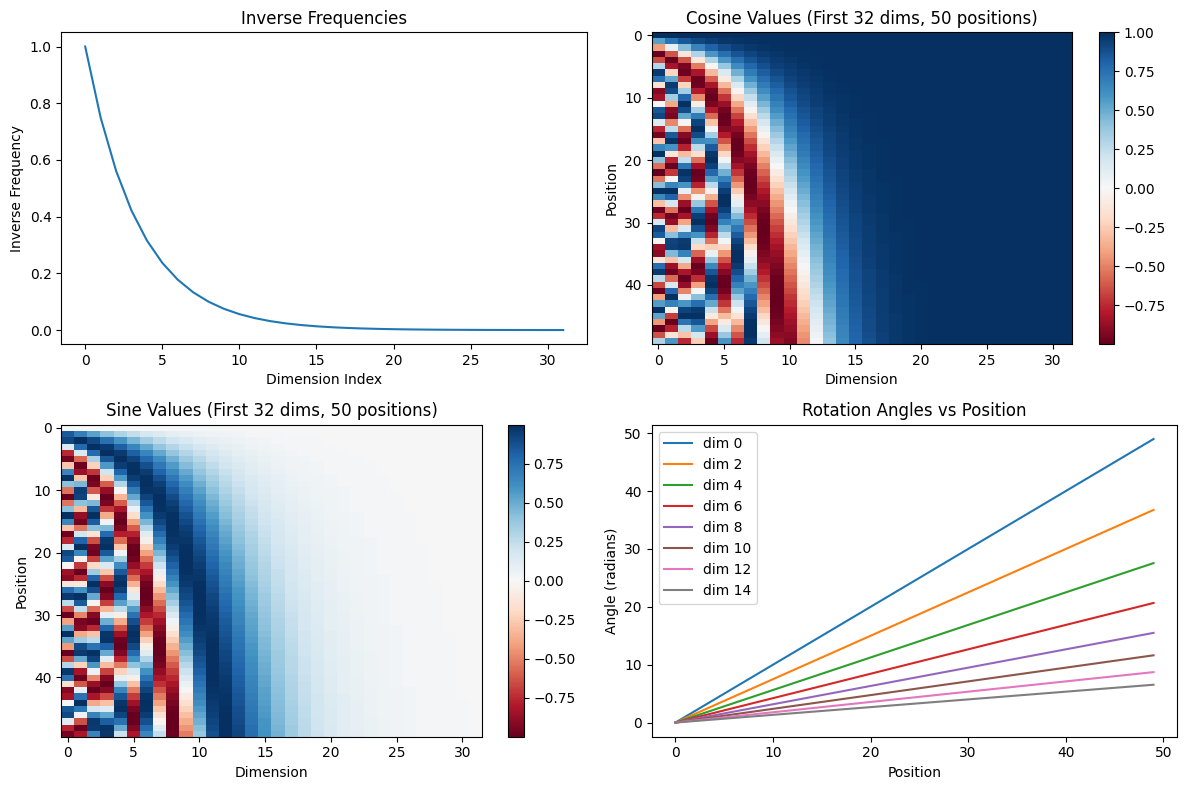


ÊóãËΩ¨‰ΩçÁΩÆÁºñÁ†Å(RoPE)Á§∫‰æãÂÆåÊàêÔºÅ


In [ ]:
import torch
import torch.nn as nn
import math
import matplotlib.pyplot as plt
import numpy as np

class RotaryPositionalEmbedding(nn.Module):
    """
    ÊóãËΩ¨‰ΩçÁΩÆÁºñÁ†Å(RoPE - Rotary Position Embedding)
    
    RoPEÁöÑÊ†∏ÂøÉÊÄùÊÉ≥ÊòØÈÄöËøáÊóãËΩ¨Áü©ÈòµÊù•ÁºñÁ†Å‰ΩçÁΩÆ‰ø°ÊÅØÔºåÁõ∏ÂØπ‰∫éÁªùÂØπ‰ΩçÁΩÆÁºñÁ†ÅÔºå
    RoPEËÉΩÂ§üÊõ¥Â•ΩÂú∞ÊçïÊçâÂ∫èÂàó‰∏≠ÂÖÉÁ¥†ÁöÑÁõ∏ÂØπ‰ΩçÁΩÆÂÖ≥Á≥ª„ÄÇ
    """
    
    def __init__(self, dim, max_position_embeddings=2048, base=10000):
        super().__init__()
        self.dim = dim  # ÁâπÂæÅÁª¥Â∫¶
        self.max_position_embeddings = max_position_embeddings # ÊúÄÂ§ßÂ∫èÂàóÈïøÂ∫¶
        self.base = base
        
        # È¢ÑËÆ°ÁÆóÈ¢ëÁéá
        inv_freq = 1.0 / (base ** (torch.arange(0, dim, 2).float() / dim)) 
        self.register_buffer('inv_freq', inv_freq) # Ê≥®ÂÜåÁºìÂ≠ò
        
        # È¢ÑËÆ°ÁÆóÊóãËΩ¨Áü©Èòµ
        self._set_cos_sin_cache(max_position_embeddings) # È¢ÑËÆ°ÁÆócosÂíåsinÂÄº
    
    def _set_cos_sin_cache(self, seq_len):
        """È¢ÑËÆ°ÁÆócosÂíåsinÂÄº"""
        # ‰ΩçÁΩÆÁ¥¢Âºï
        t = torch.arange(seq_len, dtype=self.inv_freq.dtype, device=self.inv_freq.device) 
        
        # ËÆ°ÁÆóËßíÂ∫¶: position * inv_freq
        freqs = torch.outer(t, self.inv_freq)  # [seq_len, dim//2]
        
        # ÊãºÊé•‰ª•ÂåπÈÖçhead_dim
        emb = torch.cat((freqs, freqs), dim=-1)  # [seq_len, dim]
        
        # ÁºìÂ≠òcosÂíåsinÂÄº
        self.register_buffer('cos_cached', emb.cos())
        self.register_buffer('sin_cached', emb.sin())
    
    def forward(self, x, seq_len=None):
        """
        Â∫îÁî®ÊóãËΩ¨‰ΩçÁΩÆÁºñÁ†Å
        
        Args:
            x: ËæìÂÖ•Âº†Èáè [batch_size, seq_len, num_heads, head_dim]
            seq_len: Â∫èÂàóÈïøÂ∫¶
        
        Returns:
            Â∫îÁî®RoPEÂêéÁöÑÂº†Èáè
        """
        if seq_len is None:
            seq_len = x.shape[1] # Â∫èÂàóÈïøÂ∫¶
        
        # Â¶ÇÊûúÂ∫èÂàóÈïøÂ∫¶Ë∂ÖËøáÁºìÂ≠òÔºåÈáçÊñ∞ËÆ°ÁÆó
        if seq_len > self.cos_cached.shape[0]:
            self._set_cos_sin_cache(seq_len)
        
        # Ëé∑ÂèñÂØπÂ∫îÈïøÂ∫¶ÁöÑcosÂíåsin
        cos = self.cos_cached[:seq_len]
        sin = self.sin_cached[:seq_len]
        
        # Â∫îÁî®ÊóãËΩ¨‰ΩçÁΩÆÁºñÁ†Å
        return self.apply_rotary_pos_emb(x, cos, sin)
    
    def apply_rotary_pos_emb(self, x, cos, sin):
        """Â∫îÁî®ÊóãËΩ¨‰ΩçÁΩÆÁºñÁ†ÅÁöÑÊ†∏ÂøÉÂáΩÊï∞"""
        # x: [batch_size, seq_len, num_heads, head_dim]
        # cos, sin: [seq_len, head_dim]
        
        # Ë∞ÉÊï¥cosÂíåsinÁöÑÁª¥Â∫¶‰ª•ÂåπÈÖçx
        # ‰ªé [seq_len, head_dim] Êâ©Â±ïÂà∞ [1, seq_len, 1, head_dim]
        cos = cos.unsqueeze(0).unsqueeze(2)  # [1, seq_len, 1, head_dim]
        sin = sin.unsqueeze(0).unsqueeze(2)  # [1, seq_len, 1, head_dim]
        
        # Â∞ÜxÂàÜÊàê‰∏§ÈÉ®ÂàÜËøõË°åÊóãËΩ¨
        x1, x2 = x[..., ::2], x[..., 1::2]
        
        # ÊóãËΩ¨Êìç‰Ωú: Â§çÊï∞‰πòÊ≥ïÁöÑÂÆûÁé∞
        # (a + bi) * (cos + sin*i) = (a*cos - b*sin) + (a*sin + b*cos)i
        rotated_x1 = x1 * cos[..., ::2] - x2 * sin[..., ::2] # ÂÅ∂Êï∞‰ΩçÁΩÆ
        rotated_x2 = x1 * sin[..., 1::2] + x2 * cos[..., 1::2] # Â•áÊï∞‰ΩçÁΩÆ
        
        # ÈáçÊñ∞‰∫§ÈîôÊéíÂàó
        rotated_x = torch.zeros_like(x)
        rotated_x[..., ::2] = rotated_x1 # ÂÅ∂Êï∞‰ΩçÁΩÆ
        rotated_x[..., 1::2] = rotated_x2 # Â•áÊï∞‰ΩçÁΩÆ
        
        return rotated_x

class MultiHeadAttentionWithRoPE(nn.Module):
    """Â∏¶ÊúâRoPEÁöÑÂ§öÂ§¥Ê≥®ÊÑèÂäõÊú∫Âà∂"""
    
    def __init__(self, d_model, num_heads, max_position_embeddings=2048):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        
        assert self.head_dim * num_heads == d_model
        
        self.q_proj = nn.Linear(d_model, d_model) # Á∫øÊÄßÂèòÊç¢
        self.k_proj = nn.Linear(d_model, d_model) # Á∫øÊÄßÂèòÊç¢
        self.v_proj = nn.Linear(d_model, d_model) # Á∫øÊÄßÂèòÊç¢
        self.o_proj = nn.Linear(d_model, d_model) # Á∫øÊÄßÂèòÊç¢
        
        # ÊóãËΩ¨‰ΩçÁΩÆÁºñÁ†Å
        self.rotary_emb = RotaryPositionalEmbedding(
            self.head_dim, max_position_embeddings
        )
        
        self.scale = self.head_dim ** -0.5 # Áº©ÊîæÂõ†Â≠ê
    
    def forward(self, x, mask=None):
        batch_size, seq_len, _ = x.shape # ÊâπÈáèÂ§ßÂ∞èÔºåÂ∫èÂàóÈïøÂ∫¶ÔºåÁâπÂæÅÁª¥Â∫¶
        
        # Á∫øÊÄßÂèòÊç¢
        q = self.q_proj(x)
        k = self.k_proj(x)
        v = self.v_proj(x)
        
        # ÈáçÂ°ë‰∏∫Â§öÂ§¥
        q = q.view(batch_size, seq_len, self.num_heads, self.head_dim)
        k = k.view(batch_size, seq_len, self.num_heads, self.head_dim)
        v = v.view(batch_size, seq_len, self.num_heads, self.head_dim)
        
        # Â∫îÁî®ÊóãËΩ¨‰ΩçÁΩÆÁºñÁ†Å
        q = self.rotary_emb(q, seq_len) # [batch_size, seq_len, num_heads, head_dim]
        k = self.rotary_emb(k, seq_len) # [batch_size, seq_len, num_heads, head_dim]
        
        # ËΩ¨Êç¢Áª¥Â∫¶Áî®‰∫éÊ≥®ÊÑèÂäõËÆ°ÁÆó
        q = q.transpose(1, 2)  # [batch_size, num_heads, seq_len, head_dim]
        k = k.transpose(1, 2)
        v = v.transpose(1, 2)
        
        # ËÆ°ÁÆóÊ≥®ÊÑèÂäõÂàÜÊï∞
        scores = torch.matmul(q, k.transpose(-2, -1)) * self.scale # [batch_size, num_heads, seq_len, seq_len]
        
        # Â∫îÁî®Êé©Á†Å
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9) # [batch_size, num_heads, seq_len, seq_len]
        
        # Ê≥®ÊÑèÂäõÊùÉÈáç
        attn_weights = torch.softmax(scores, dim=-1) # [batch_size, num_heads, seq_len, seq_len]
        
        # Â∫îÁî®Ê≥®ÊÑèÂäõÊùÉÈáç
        attn_output = torch.matmul(attn_weights, v) # [batch_size, num_heads, seq_len, head_dim]
        
        # ÈáçÊñ∞ÁªÑÂêàÂ§¥
        attn_output = attn_output.transpose(1, 2).contiguous().view(
            batch_size, seq_len, self.d_model
        )
        
        # ËæìÂá∫ÊäïÂΩ±
        output = self.o_proj(attn_output) # [batch_size, seq_len, d_model]
        
        return output, attn_weights # [batch_size, seq_len, d_model], [batch_size, num_heads, seq_len, seq_len]

def visualize_rope():
    """ÂèØËßÜÂåñRoPEÁöÑÈ¢ëÁéáÁâπÊÄß"""
    dim = 64
    max_len = 100
    
    rope = RotaryPositionalEmbedding(dim, max_len)
    
    # ÂàõÂª∫Á§∫‰æãËæìÂÖ•
    x = torch.randn(1, max_len, 1, dim)
    
    # Â∫îÁî®RoPE
    rotated_x = rope(x)
    
    # ÂèØËßÜÂåñÈ¢ëÁéá
    plt.figure(figsize=(12, 8))
    
    # ÁªòÂà∂È¢ëÁéáÂàÜÂ∏É
    plt.subplot(2, 2, 1)
    plt.plot(rope.inv_freq.numpy())
    plt.title('Inverse Frequencies')
    plt.xlabel('Dimension Index')
    plt.ylabel('Inverse Frequency')
    
    # ÁªòÂà∂cosÂÄº
    plt.subplot(2, 2, 2)
    cos_matrix = rope.cos_cached[:50, :32].numpy()
    plt.imshow(cos_matrix, cmap='RdBu', aspect='auto')
    plt.title('Cosine Values (First 32 dims, 50 positions)')
    plt.xlabel('Dimension')
    plt.ylabel('Position')
    plt.colorbar()
    
    # ÁªòÂà∂sinÂÄº
    plt.subplot(2, 2, 3)
    sin_matrix = rope.sin_cached[:50, :32].numpy()
    plt.imshow(sin_matrix, cmap='RdBu', aspect='auto')
    plt.title('Sine Values (First 32 dims, 50 positions)')
    plt.xlabel('Dimension')
    plt.ylabel('Position')
    plt.colorbar()
    
    # ÁªòÂà∂ÊóãËΩ¨ËßíÂ∫¶Èöè‰ΩçÁΩÆÁöÑÂèòÂåñ
    plt.subplot(2, 2, 4)
    positions = torch.arange(50)
    angles = torch.einsum('i,j->ij', positions.float(), rope.inv_freq[:8]) 
    for i in range(8):
        plt.plot(positions, angles[:, i], label=f'dim {i*2}')
    plt.title('Rotation Angles vs Position')
    plt.xlabel('Position')
    plt.ylabel('Angle (radians)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

def test_rope_example():
    """ÊµãËØïRoPEÁöÑÂü∫Êú¨ÂäüËÉΩ"""
    print("ÊµãËØïÊóãËΩ¨‰ΩçÁΩÆÁºñÁ†Å(RoPE)")
    
    # ÂèÇÊï∞ËÆæÁΩÆ
    batch_size = 2
    seq_len = 10
    d_model = 128
    num_heads = 8
    
    # ÂàõÂª∫Ê®°Âûã
    attention = MultiHeadAttentionWithRoPE(d_model, num_heads)
    
    # ÂàõÂª∫ËæìÂÖ•
    x = torch.randn(batch_size, seq_len, d_model)
    
    # ÂâçÂêë‰º†Êí≠
    output, attn_weights = attention(x)
    
    print(f"ËæìÂÖ•ÂΩ¢Áä∂: {x.shape}") # [batch_size, seq_len, d_model]
    print(f"ËæìÂá∫ÂΩ¢Áä∂: {output.shape}") # [batch_size, seq_len, d_model]
    print(f"Ê≥®ÊÑèÂäõÊùÉÈáçÂΩ¢Áä∂: {attn_weights.shape}") # [batch_size, num_heads, seq_len, seq_len]
    
    # ÊµãËØïÁõ∏ÂØπ‰ΩçÁΩÆÁâπÊÄß
    print("\nÊµãËØïÁõ∏ÂØπ‰ΩçÁΩÆÁâπÊÄß:")
    
    # ÂàõÂª∫‰∏§‰∏™Â∫èÂàóÔºö‰∏Ä‰∏™ÊòØÂè¶‰∏Ä‰∏™ÁöÑÂπ≥ÁßªÁâàÊú¨
    seq1 = torch.randn(1, 5, d_model)
    seq2 = torch.cat([torch.zeros(1, 2, d_model), seq1], dim=1)  # ÂêëÂè≥Âπ≥Áßª2‰Ωç
    
    # ËÆ°ÁÆóÊ≥®ÊÑèÂäõ
    _, attn1 = attention(seq1)
    _, attn2 = attention(seq2)
    
    print(f"Â∫èÂàó1Ê≥®ÊÑèÂäõÊùÉÈáçÂΩ¢Áä∂: {attn1.shape}") # [batch_size, num_heads, seq_len, seq_len]
    print(f"Â∫èÂàó2Ê≥®ÊÑèÂäõÊùÉÈáçÂΩ¢Áä∂: {attn2.shape}") # [batch_size, num_heads, seq_len, seq_len]
    
    # RoPEÂ∫îËØ•‰øùÊåÅÁõ∏ÂØπ‰ΩçÁΩÆÂÖ≥Á≥ª
    print("RoPEÊúâÂä©‰∫é‰øùÊåÅÂ∫èÂàó‰∏≠ÂÖÉÁ¥†ÁöÑÁõ∏ÂØπ‰ΩçÁΩÆÂÖ≥Á≥ª")

def compare_with_absolute_pe():
    """ÊØîËæÉRoPE‰∏éÁªùÂØπ‰ΩçÁΩÆÁºñÁ†Å"""
    print("\nÊØîËæÉRoPE‰∏éÁªùÂØπ‰ΩçÁΩÆÁºñÁ†Å:")
    
    d_model = 64
    seq_len = 20
    
    # ÂàõÂª∫RoPE
    rope = RotaryPositionalEmbedding(d_model, seq_len)
    
    # ÂàõÂª∫ÁªùÂØπ‰ΩçÁΩÆÁºñÁ†Å
    position = torch.arange(seq_len).unsqueeze(1)
    div_term = torch.exp(torch.arange(0, d_model, 2) * 
                        (-math.log(10000.0) / d_model))
    
    abs_pe = torch.zeros(seq_len, d_model)
    abs_pe[:, 0::2] = torch.sin(position * div_term)
    abs_pe[:, 1::2] = torch.cos(position * div_term)
    
    print("RoPE‰ºòÂäø:")
    print("1. Êõ¥Â•ΩÁöÑÁõ∏ÂØπ‰ΩçÁΩÆÂª∫Ê®°")
    print("2. ÂØπÂ∫èÂàóÈïøÂ∫¶ÁöÑÊ≥õÂåñËÉΩÂäõÊõ¥Âº∫")
    print("3. Âú®ÈïøÂ∫èÂàó‰∏äÊÄßËÉΩÊõ¥Á®≥ÂÆö")
    
    print("\nÁªùÂØπ‰ΩçÁΩÆÁºñÁ†ÅÁâπÁÇπ:")
    print("1. Áõ¥Êé•Ê∑ªÂä†Âà∞ËæìÂÖ•embeddings")
    print("2. ÁÆÄÂçï‰ΩÜÂèØËÉΩ‰∏¢Â§±Áõ∏ÂØπ‰ΩçÁΩÆ‰ø°ÊÅØ")
    print("3. ÂØπÂ∫èÂàóÈïøÂ∫¶ÊïèÊÑü")

if __name__ == "__main__":
    # ËøêË°åÊµãËØï
    test_rope_example()
    
    # ÊØîËæÉ‰∏çÂêå‰ΩçÁΩÆÁºñÁ†ÅÊñπÊ≥ï
    compare_with_absolute_pe()
    
    # ÂèØËßÜÂåñÔºàÈúÄË¶ÅmatplotlibÔºâ
    try:
        visualize_rope()
    except ImportError:
        print("ÈúÄË¶ÅÂÆâË£ÖmatplotlibÊù•ËøêË°åÂèØËßÜÂåñ: pip install matplotlib")
    
    print("\nÊóãËΩ¨‰ΩçÁΩÆÁºñÁ†Å(RoPE)Á§∫‰æãÂÆåÊàêÔºÅ")

 Âè≥‰∏äÂõæÔºöCosine Values (First 32 dims, 50 positions)
Ê†áÈ¢òÔºöCosine ValuesÔºàÂâç 32 ‰∏™Áª¥Â∫¶ÔºåÂâç 50 ‰∏™‰ΩçÁΩÆÔºâ

Ê®™ËΩ¥ÔºöÁª¥Â∫¶ÔºàDimensionÔºâ

Á∫µËΩ¥Ôºö‰ΩçÁΩÆÔºàPositionÔºâ

Ëâ≤ÂΩ©Ôºöcos ÂÄºÁöÑÂ§ßÂ∞èÔºà-1 ~ 1Ôºâ

‚úÖ Âê´‰πâÔºö
Â±ïÁ§∫‰∫ÜÊØè‰∏™‰ΩçÁΩÆÂíåÁª¥Â∫¶ÂØπÂ∫îÁöÑ cos(Œ∏) ÂÄºÂàÜÂ∏É„ÄÇ

ÂèØ‰ª•ÁúãÂà∞Ôºö

Ë∂äÈù†Â∑¶Ôºà‰ΩéÁª¥ÔºâÔºåÂë®ÊúüË∂äÁü≠ÔºàÈ¢ëÁéáÈ´òÔºâ

Ë∂äÈù†Âè≥ÔºàÈ´òÁª¥ÔºâÔºåcos ÂèòÂåñÊõ¥ÁºìÊÖ¢ÔºàÈ¢ëÁéá‰ΩéÔºâ

ËØ¥ÊòéÔºöRoPE ÂØπ‰∏çÂêåÁª¥Â∫¶‰ΩøÁî®‰∏çÂêåÈ¢ëÁéáÁöÑÊ≠£‰ΩôÂº¶ÁºñÁ†ÅÔºå‰ª•ÁªÑÂêàÂá∫‰∏∞ÂØåÁöÑ‰ΩçÁΩÆÁâπÂæÅ

üî∂ Â∑¶‰∏ãÂõæÔºöSine Values (First 32 dims, 50 positions)
Ê†áÈ¢òÔºöSine ValuesÔºàÂâç 32 ‰∏™Áª¥Â∫¶ÔºåÂâç 50 ‰∏™‰ΩçÁΩÆÔºâ

Ê†ºÂºèÂíåÂè≥‰∏äÂõæ‰∏ÄÊ†∑ÔºåÂè™‰∏çËøáÊòØÂ±ïÁ§∫ÁöÑ sin ÂÄº„ÄÇ

‚úÖ Âê´‰πâÔºö
‰∏é cos ‰∏ÄÊ†∑Ôºåsin ÂÄº‰πüÊòØÂë®ÊúüÊÄßÁöÑÔºåÈ¢ëÁéáÈÄíÂáè„ÄÇ

Ëøô‰∫õ sin Âíå cos ‰ºöË¢´Áî®‰∫éÂØπ query/key ÁöÑ‰∏çÂêåÁª¥Â∫¶ËøõË°å‚ÄúÂ§çÊï∞ÂºèÊóãËΩ¨‚ÄùÔºàÂç≥‰∫åÁª¥ÊóãËΩ¨Ôºâ„ÄÇ